# EPI 555 Assignment 1

## Question 1  

### Consider the following  
$Y_i$ are the counts of lip cancer for a given county  
$E_i$ are the expected counts in that county  
$x_i$ is the proportion in that county in AFF  

### and follows the quasi-likelihood Poisson log-linear regression model  
$\mathbf{E}[Y_i] = E_i ~ exp(\alpha + \beta x_I)$  

### where  
$var(Y_i) = κ\mathbf{E}[Y_i]$  
$k > 0$  
$k$ allows for overdispersion  

### (a) Give an interpretation of the parameters $exp(\alpha)$ and $exp(\beta)$.

$e^{\alpha}$ represents the the baseline relative risk if there was zero 
percentage of the population that particpated in AFF.

$e^{\beta}$ is the multiplicative change in the relative risk that is 
present when the entire population particpates in AFF.

### (b) Fit a model and report the estimates & standard errors for $\alpha$ & $\beta$. Give the 95% CI for $exp(\beta)$ 

First we need to load in the spatial epi data into R

In [1]:
library(SpatialEpi)
data(scotland)
Y <- scotland$data$cases
X <- scotland$data$AFF
E <- scotland$data$expected

Loading required package: sp


Next we can fit the model using the quasipoisson model that allows for overdispersion

In [2]:
model1 <- glm(Y ~ X + offset(log(E)), 
              family = quasipoisson(link = "log"))

The estimates and standard errors for alpha and beta are shown below

In [3]:
as.data.frame(summary(model1)$coefficients[,1:2], 
              row.names=c("alpha", "beta"))

,Estimate,Std. Error
alpha,-0.5422682,0.154181
beta,7.373219,1.320769


CI can be calculated by hand using the standard errors or with the `confint` function

In [4]:
as.data.frame(exp(confint.default(model1)), 
              row.names=c("alpha", "beta"))[2,]

,2.5 %,97.5 %
beta,119.6487,21202.59


### (c) Next incorporate logitude and latitude to the model to investigate possible bias 

The global positioning data is located in the geo attribute of the scotland 
object but we will need to merge to be sure that data lines up.

In [37]:
df <- merge(scotland$data, scotland$geo)
names(df) <- c("county", "Y", "E", "X", "lat", "long") 

A very simple way to incorporate geography is by adding them as betas to 
our log-linear model

In [39]:
model2 <- glm(Y ~ X + lat + long + offset(log(E)), data=df, 
              family = quasipoisson(link = "log"))

In [40]:
summary(model2)


Call:
glm(formula = Y ~ X + lat + long + offset(log(E)), family = quasipoisson(link = "log"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4770  -1.1089   0.2355   1.2445   3.3086  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.9325649  0.5258335  -5.577 8.89e-07 ***
X            5.6710174  1.1821844   4.797 1.39e-05 ***
lat         -0.0008745  0.0013260  -0.659    0.512    
long         0.0038518  0.0007056   5.459 1.36e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 3.070648)

    Null deviance: 380.73  on 55  degrees of freedom
Residual deviance: 157.28  on 52  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


### (d) Disuss results

If there was truly no information provided by location we would expect the 
addition of lat/long to provide no info and not change the results (example below). 
Their inclusion, however, iteracts with our alpha estimate which could be a cause of 
spatial relatedness. This model is not very interpretable as effects of changes in 
lat/long are difficult to interpret outside of there possibly being a geographical effect.

In [8]:
# make up some random variables
ran1 <- rnorm(length(Y))
ran2 <- rnorm(length(Y))

random_var_model <- model2 <- glm(Y ~ X + ran1 + ran2 + offset(log(E)), 
                                  family = quasipoisson(link = "log"))

In [9]:
# random variables do not alter the alpha and beta much
summary(random_var_model)


Call:
glm(formula = Y ~ X + ran1 + ran2 + offset(log(E)), family = quasipoisson(link = "log"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8099  -1.2682   0.1584   1.3619   4.6255  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.51655    0.16027  -3.223  0.00219 ** 
X            7.22271    1.36087   5.307 2.33e-06 ***
ran1         0.08197    0.12194   0.672  0.50445    
ran2        -0.01819    0.09051  -0.201  0.84148    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 5.045947)

    Null deviance: 380.73  on 55  degrees of freedom
Residual deviance: 236.14  on 52  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


## Question 2
Using the proximity to traffic data run a logistic regression with child 
number of respiratory illnesses per year as the response variable, proximity 
to traffic as your explanatory variable of concern, and any number of 
demographic variables to adjust for in your analysis. What are the findings 
and the limitations of the analysis.

#### Examine the data and run basic analysis

In [10]:
source("./AlaskaScript.R", echo=FALSE)

In [11]:
asthma_model <- glm(illness2 ~ smoke + age + gender + exposure + parental, 
                    family = "binomial")

In [12]:
summary(asthma_model)


Call:
glm(formula = illness2 ~ smoke + age + gender + exposure + parental, 
    family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7556  -0.4710  -0.4183  -0.3740   2.3989  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -1.31954    0.91619  -1.440   0.1498  
smoke1       0.11185    0.24097   0.464   0.6425  
age         -0.23331    0.15763  -1.480   0.1388  
gender1      0.09110    0.23048   0.395   0.6927  
exposure     0.07538    0.05395   1.397   0.1624  
parental1    0.57475    0.26122   2.200   0.0278 *
parental2    0.37107    0.55207   0.672   0.5015  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 561.67  on 893  degrees of freedom
Residual deviance: 552.17  on 887  degrees of freedom
AIC: 566.17

Number of Fisher Scoring iterations: 5


### What are the limitations of this analysis?

Using a logistic regression to show when the number of illnesses is 
greater than 2 with the data provided has several limitations. 

#### 1. Arbitrary cutoff of response variable  
    Dichotimizing the response variable glosses over some of the diversity 
    in the outcome and in doing so we may be losing the ability of the 
    explanatory variables to explain the variation in the response.  
#### 2. Calculation of exposure variable  
    The exposure variable is reported as the sum of all intersections within 
    100 meters of a childs house times the number of cars that passed 
    through that intersection. One could imagine two seperate 100 meter 
    blocks that have the same number of roads and the same distribution of 
    traffic in the block. if the high traffic intersections were clustered 
    around the childs house one would expect a greater effect than if they 
    were at the peripheries. These two childrens traffic score, however, would 
    be the same.

Keeping These limitations in mind the significant predictor that appears 
in this model is parents status of asthma being positive leading to a 
child being taken in for repiratory illness more often. The theory behind 
this analysis is that higher road trafiic in an area (quantified as the 
exposure metric) leads to higher PM10 levels in an area which leads to a 
greater number of respiratory ilnesses among children. If a way to measure 
PM10 and a particular spatial are culd be obtained then perhaps a stronger 
correlation would be found.

## Question 3

### Consider the following  

$Y_i$ is the observed lung cancer mortality for a particular Ohio county  
$E_i$ is the expected count for that county adjusted for age, race, and gender composition  
$\theta_i$ is the relative risk for that county  

### (a) Describe precisely what $\theta_{i}$ represents.  

The parameter $\theta_{i}$ represents the relative risk of lung cancer
mortality associated with location $i$ after adjusting for demographic 
factors. That is to say that  $\theta_{i}$ is the additional (or reduced) 
risk of other factors in that area outside of race, age, and gender.

### (b) Calculate reference probabilities for each of the gender, race, age strata, and provide plots of these probabilities versus age, for each of the 4 gender-race combinations.  

First, we need to load in the data which also provides us a spatial map 
of county lung cancer deaths

In [17]:
source("./OhioScript-1.R", echo=FALSE)

The reference probabilty for each race, age, gender strata can be 
calculated by taken the observed deaths for that strata divided by
the sample size.

In [18]:
options(jupyter.plot_mimetypes = 'image/png')

In [19]:
# quick check to make sure our data is sorted in numeric order as assumed in the starter script
!is.unsorted(ohio$fips)

[1] TRUE

In [20]:
# group by the demographic variables to get there total population and death counts
library(plyr)
strata <- ddply(ohio, ~age+sex+race, summarise, 
                deaths=sum(deaths), popn=sum(popn))

# the probability of death fr any strata is approximately deaths / population
strata <- ddply(ohio, ~age+sex+race, summarise, 
                deaths=sum(deaths), popn=sum(popn))
strata$prob <- strata$deaths / strata$popn

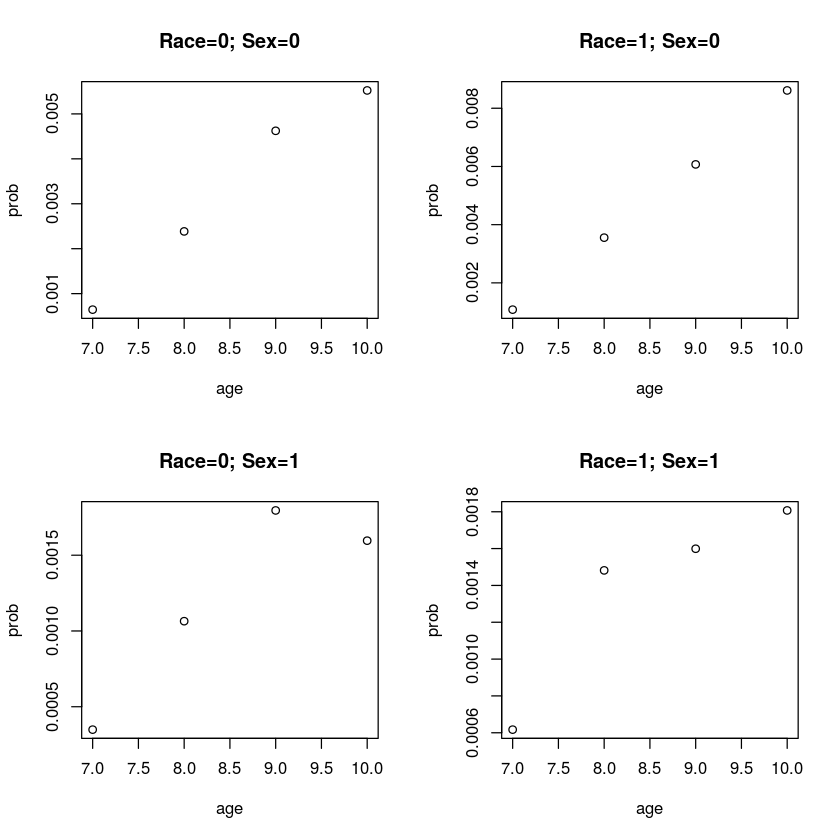

In [21]:
# plot in a loop
par(mfrow=c(2,2))
for (s in unique(strata$sex)){
    for (r in unique(strata$race)){
        with(subset(strata, race == r & sex == s), 
             plot(age, prob,main=paste0("Race=",r,"; Sex=",s)))
    }
}

Within each strata there appears to be an increase in the probability 
of lung cancer associated with an increase in age  

### (c) Calculate and provide a map of the expected numbers $E_i$.

In [22]:
# merge on the strata data to the original ohio data
ohio <- merge(ohio, strata[,c("age", "sex", "race", "prob")])

# expected number is prob for strata times population number
ohio$expected <- ohio$prob * ohio$popn

In [23]:
# group by county the sum of the expected number of deaths and the observed number of deaths
county <- ddply(ohio, ~fips, summarise, expected=sum(expected), deaths=sum(deaths))
county <- county[order(county$fips),]

In [24]:
# utility function for plotting

plot_ohio <- function(plotvar, title_){
    # plots a map of Ohio counties assuimg the plotvar argument is of
    # length 88 where each value represents an Ohio county sorted by 
    # fips number.
    if(length(plotvar) != 88){
        stop("'plotvar' argument must be of length 88")
    }
    nclr <- 8 # next few lines set up the color scheme for plotting
    plotclr <- brewer.pal(nclr,"BuPu")
    brks <- round(quantile(plotvar,probs=seq(0,1,1/(nclr))),digits=1)
    colornum <- findInterval(plotvar,brks,all.inside=T)
    colcode <- plotclr[colornum]
    # Note order of data in file is in terms of increasing FIPS codes, which is the same
    # as in the map function (see county.fips)
    map("county", "ohio",col=colcode,fill=T)
    title(title_)
    leg.txt <- paste("[",brks[nclr],",",brks[nclr+1],"]",sep="")
      for(i in (nclr-1):1){
        leg.txt <- append(leg.txt,paste("[",brks[i],",",brks[i+1],")",sep=""),)
    }
    leg.txt <- rev(leg.txt)
    legend("bottomright",legend=leg.txt,fill=plotclr,bty="n",cex=.8)
}

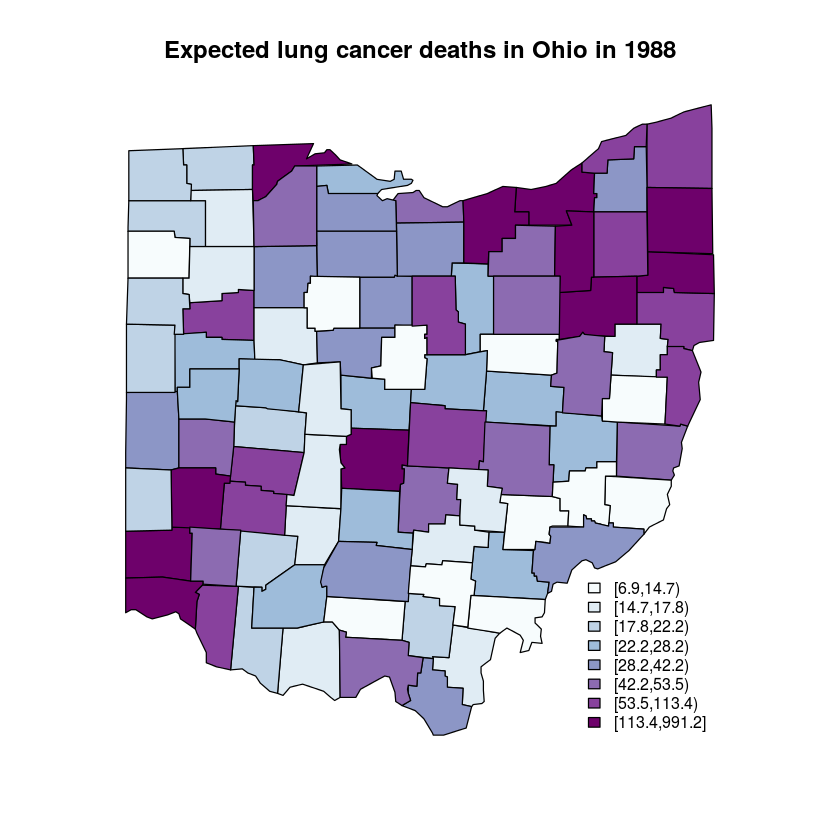

In [25]:
plot_ohio(county$expected, "Expected lung cancer deaths in Ohio in 1988")

In [26]:
county$SMR <- county$deaths / county$expected

### (d) Provide a map of the SMRs, defined as ...
$SMR_i = \theta_i = \frac{Y_i}{E_i}$

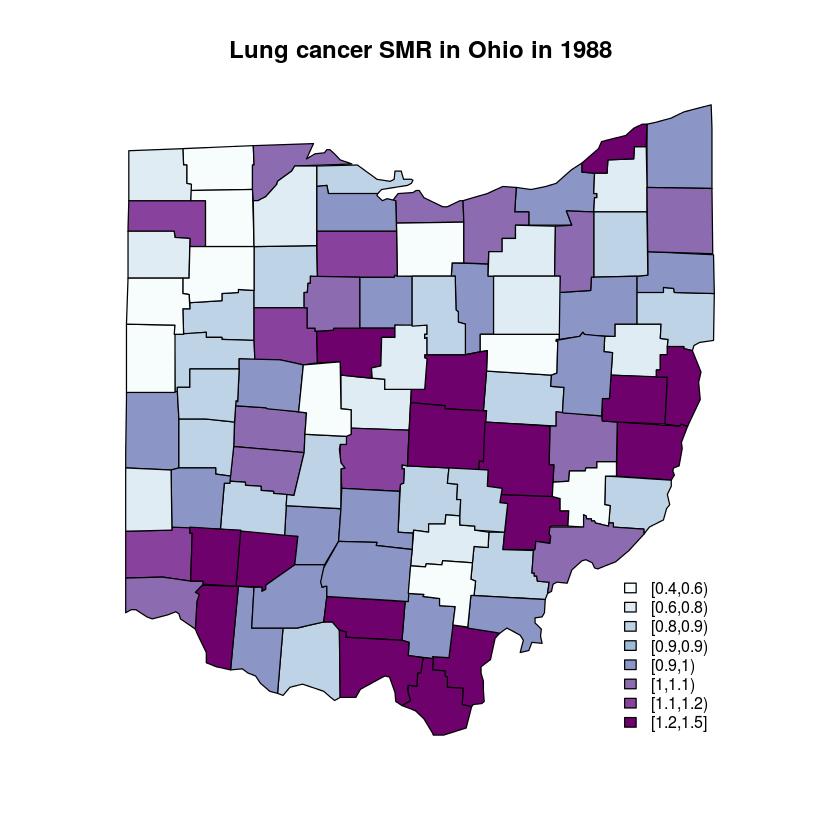

In [27]:
plot_ohio(county$SMR, "Lung cancer SMR in Ohio in 1988")

### (d) Provide a map of the SMR standard errors, defined as ...
$s.e.(SMR_i)  = \sqrt{\frac{\theta_i}{E_i}}$

In [28]:
county$SMR_error <- (county$SMR / county$expected)**.5

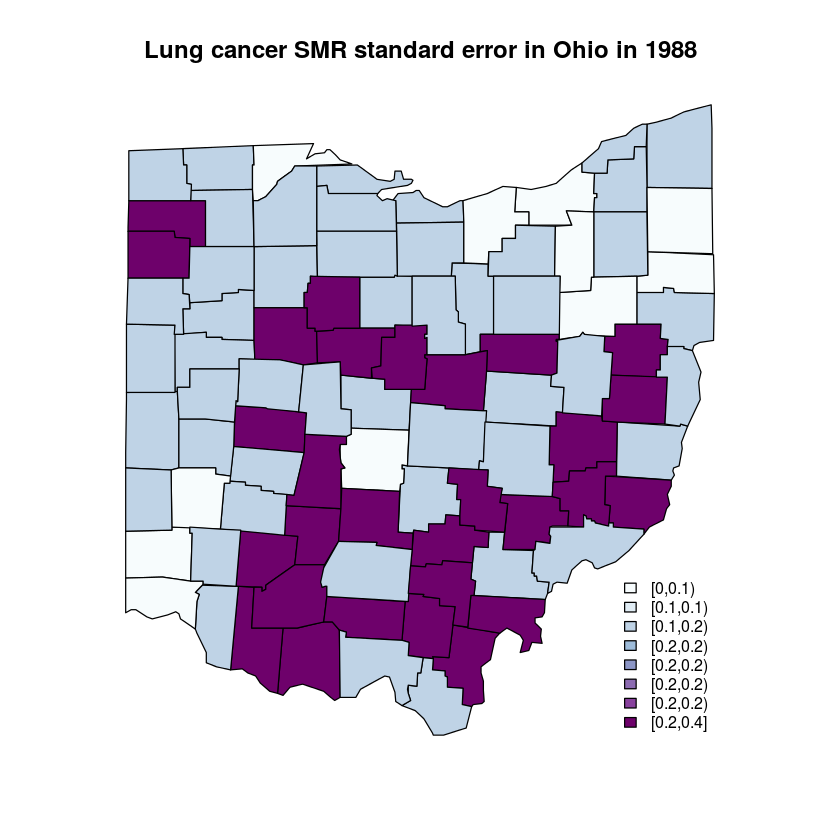

In [29]:
plot_ohio(county$SMR_error, "Lung cancer SMR standard error in Ohio in 1988")

### (e) Plot the SMRs versus the standard errors, discuss the stability of SMRs.

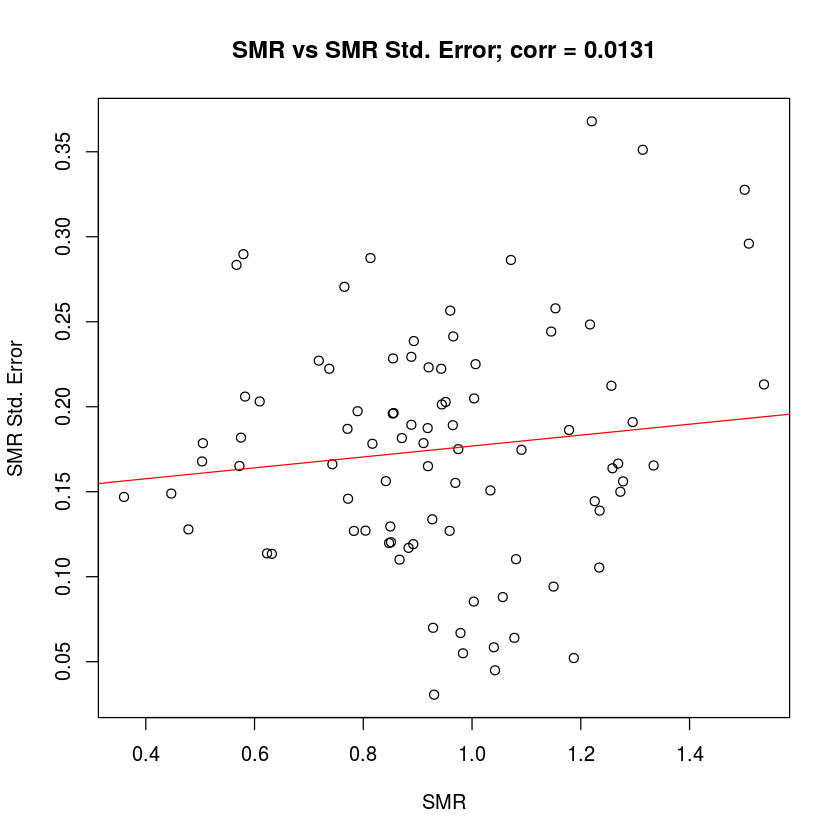

In [30]:
smr_corr <- lm(county$SMR_error~county$SMR)
plot(county$SMR, county$SMR_error, xlab="SMR", ylab="SMR Std. Error",
     main=paste0("SMR vs SMR Std. Error; corr = ", round(summary(smr_corr)$r.squared, digits=4)))
abline(smr_corr, col="red")

Although there ssems to be a slight association between larger SMR and larger 
standard errors of SMR the correlation is minimal. That is the uncertainty  of 
the SMR doesnt seem to be coonected with the estimate of SMR.